#### Why Prepocessing
data biasanya incomplete, noisy spt mising value dan outliers, dan inconsiste dalam penulisan kolom

## 1. Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('Data.csv')
data

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [4]:
#mengambil data ke 0 sampai ke -2
x = data.iloc[:,:3].values

#hanya mengambil 3
y = data.iloc[:,3].values

print(x, 'Data Feature')
print('\n=====================================')
print(y, 'Data Label')

[['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]] Data Feature

['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No'] Data Label


### Handle Missing Data

In [5]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

ada 2 cara, dapat menghapus baris atau mengganti nilai null menggunakan nilai mean, modus atau median. kita coba mengganti dengan nilai mean.

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy='mean') #missing value biasanya disini oleh np.nan


#fit nilai imputer ke dalam data x, untuk kolom age (index ke 1) dan salary(index ke 2)
imputer = imputer.fit(x[:,1:3])

#ganti nilai hilang menggunakan mean di kolom tersebut
x[:,1:3] = imputer.transform(x[:,1:3])

In [7]:
print(x)

[['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 54857.142857142855]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 33.714285714285715 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


## SMOTE
imbalance data adalah masalah yang cukup sering terjadi dimanifestasikan dalam deteksi penipuan, deteksi intruksi, deteksi aktifitas mencurigakan untuk beberapa nama. dalam konteks klasifikasi biner, yang lebih jarang muncul disebut kelas minoritas, dan kelas yang lebih sering muncul disebut kelas mayoritas.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import metrics

In [9]:
x , y = make_classification(
    n_classes=2,
    class_sep=0.5,
    weights=[0.05, 0.95],
    n_informative=2,
    n_redundant=0,
    flip_y=0,
    n_features=2,
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=10
    )

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Splitting data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

print('Train set :', x_train.shape , y_train.shape)
print('Test set :', x_test.shape , y_test.shape)

Train set : (800, 2) (800,)
Test set : (200, 2) (200,)


<Axes: ylabel='count'>

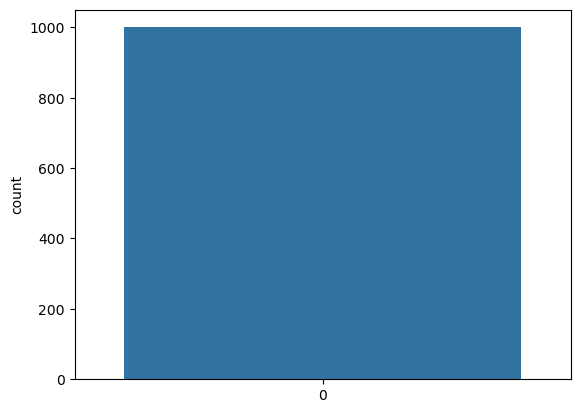

In [12]:
sns.countplot(y)

jika kita plot count maka dapat dilihat lebih jelas adanya imbalance data y atau label. maka selanjutnya kita akan split data dan lihat hasil klasifikasinya dengan model logistik regression. ketika sebelum dan sesudah data label dimasukan dalam model SMOTE

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
sns.countplot(y_res)

NameError: name 'y_res' is not defined

### Redudency Data
redudansi berarti dumplikasi adata.

In [ ]:
dataBaru = {
    'Names':['Yusuf','Allafa','Abdiel','Ipin','Ibnu','Rifal','Haidar','Yusuf','Yusuf'],
    'Marks':[56,89,90,45,34,65,77,56,56],
    'City' :['Jakarta','Yogyakarta','Solo','Surabaya','Makassar','Malang','Yogyakarta','Jakarta','Jakarta']
}

df = pd.DataFrame(dataBaru)
df

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makassar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
7,Yusuf,56,Jakarta
8,Yusuf,56,Jakarta


dapat dilihat terjadi nya duplikasi data, kita harus menghilangkan nya dengan menggunakan fungsi pandas yaitu drop_duplicates()

In [ ]:
df.drop_duplicates(subset='Names',keep='first') #yang pertama di biarkan

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makassar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


In [ ]:
df.drop_duplicates(subset='Names',keep='last') #yang terakhir dibiarkan

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makassar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
8,Yusuf,56,Jakarta


In [ ]:
df.drop_duplicates(subset='Names',keep=False, inplace=True)
df

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makassar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


## 2. Data Integration
data yang sudah di bersihkan, akan di gabungkan dari berbagai sumber untuk mendapatkan struktur terpadu dengan informasi yang lebih bermakna dan berharga. ini sebagian besar digunakan jika data dipisahkan ke dalam sumber yang berbeda. mari buat asumsi

kita memiliki data dalam format csv di tempat yang berbeda, semuanya berbicara tentang skenario yang sama. katakanlah kita memiliki beberapa tentang seorang karyawan dalam database. kami tidak  dapat mengharapkan semua data tentang karyawan berada di tabel yang sama. ada kemugkinan bahwa data pribadi karyawan akan ditempatkan di satu tabel, riwayat proyek karyawan akan berdada di tabel kedua, detail waktu masuk dan waktu keluar karyawan akan berada di tabel lain. jadi kita ingin melakukan beberapa analisis tentang karyawan, kita perlu mendapatkan semua data karyawan di satu tempat yang sama. proses penyatuan ini disebut integrasi data. untuk melakukan integrasi data kita dapat menggabungkan beberapap panda DataFrames menggunakan merge.

kita akan mengabungkan rincian siswa dari dua data set, yakni student dan marks.

In [ ]:
dataset1 = 'Students.csv'
dataset2 = 'Mark.csv'

In [ ]:
# definisikan dataset
df1 = pd.read_csv(dataset1, header=0)
df2 = pd.read_csv(dataset2)


In [ ]:
df1.head()

,student ID,gender,race/ethnicity,parental level of education,lunch
0,1,female,group B,bachelor's degree,standard
1,2,female,group C,some college,standard
2,3,female,group B,master's degree,standard
3,4,male,group A,associate's degree,free/reduced
4,5,male,group C,some college,standard


In [ ]:
df2.head()

,student ID,test preparation course,math score,reading score,writing score
0,1,none,72,72,74
1,2,completed,69,90,88
2,3,none,90,95,93
3,4,none,47,57,44
4,5,none,76,78,75


In [ ]:
df = pd.merge(df1,df2, on='student ID')
df.head(10)

,student ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75
5,6,female,group B,associate's degree,standard,none,71,83,78
6,7,female,group B,some college,standard,completed,88,95,92
7,8,male,group B,some college,free/reduced,none,40,43,39
8,9,male,group D,high school,free/reduced,completed,64,64,67
9,10,female,group B,high school,free/reduced,none,38,60,50


## 3. Data Transformation
melanjutkan dari proses data cleaning

In [15]:
dataset = pd.read_csv('Data.csv')

dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [17]:
#pisahkan

x = dataset.iloc[:,:3].values
y = dataset.iloc[:,3].values

print(x)
print('\n============')
print(y)

[['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#fit imputer ke dalam data x ke kolom age dan kolom salary
imputer = imputer.fit(x[:,1:3])

#replace nilainya
x[:,1:3] = imputer.transform(x[:,1:3])

# Encode the categorical data
cataegorical data biasanya memiliki data string. kita ubah menjadi numeric

#### Label Encoder: 

    * Metode ini bisa digunakan untuk mentranform non-numerical labels kedalam bentuk numerical labels (or nominal
      categorical variables).
    * Numerical labels akan selalu ada diantara 0 sampai n_classes-1. 
      Misalkan ada 3 kelas, berarti labelnya ada di 0, 1, dan 2.

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#encode untuk data kategorical pada kolom country
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
x[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

In [22]:
x

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 54857.142857142855],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 33.714285714285715, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

kita ubah categorical value untuk kolom purchased

In [23]:
labelencoder_y = LabelEncoder()
y=labelencoder_x.fit_transform(y)
y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Scale your Features
dalam sebuah dataset, biasanya nilai pada tiap fitur mempunyai range yang berbeda. hal ini dapat menjadikan masalah untuk beberapa model machine learning. untuk itu kita harus melakukan scaling agar semua nilai pada fitur memiliki range yangsama. pertama, kita akan melihat hasil ketika proses scaling diabaikan dan langsung masuk ke pemodelan

In [24]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

x = sc_x.fit_transform(x)

x

array([[-0.08638684,  0.02897151,  1.42592213],
       [ 1.2094158 , -1.1878321 , -1.14622202],
       [-1.38218948, -0.27522939,  0.73489833],
       [ 1.2094158 , -0.47802999,  0.        ],
       [-1.38218948,  2.15837785,  1.6562634 ],
       [-0.08638684, -0.9850315 , -0.95427097],
       [ 1.2094158 , -0.57943029, -0.57036885],
       [-0.08638684,  0.        ,  0.19743537],
       [-1.38218948,  1.75277664,  1.3107515 ],
       [-0.08638684,  1.04297453,  0.88845917],
       [ 1.2094158 , -1.28923241, -1.33817308],
       [-1.38218948, -0.8836312 , -0.95427097],
       [-0.08638684, -0.07242879, -0.3784178 ],
       [-0.08638684,  0.84017393,  0.38938643],
       [ 1.2094158 , -0.07242879, -1.26139266]])

sekarang sudah di normalisasi, sehingga nilai x tiap column sesuai range 0 dan 1